# tests

In [2]:
import numpy as np
from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt

#####DATASETS
TRAINING_ELEMENTS = 200
x = np.linspace(
    -10,
    30,
    TRAINING_ELEMENTS
)

X = np.vstack(
    (
        np.ones(TRAINING_ELEMENTS),
        x,
        x ** 2,

    )
).T

# y = x ** 3 + 50 - 100 * np.random.rand(TRAINING_ELEMENTS)
y = 5 + 2 * x ** 3 + np.random.randint(-15, 15, TRAINING_ELEMENTS)
dataset_1 = (X, y.reshape(TRAINING_ELEMENTS, 1))
############

###########GRADIENT DESCENT
def gradient_descent(
        X,
        y,
        theta_0,
        cost,
        cost_derivate,
        alpha=0.01,
        treshold=0.0001,
        max_iter=10000):
    theta, i = theta_0, 0
    costs = []
    gradient_norms = []
    while np.linalg.norm(cost_derivate(X, y, theta)) > treshold and i < max_iter:
        theta -= alpha * cost_derivate(X, y, theta)
        i += 1
        costs.append(cost(X, y, theta))
        gradient_norms.append(cost_derivate(X, y, theta))
    return theta, costs, gradient_norms
##########################

##############LINEAR COST
def linear_cost(X, y, theta):
    m, _ = X.shape
    h = np.matmul(X, theta)
    sq = (y - h) ** 2
    return sq.sum() / (2 * m)
#########################3


#########LINEAR COST DERIVATE
def linear_cost_derivate(X, y, theta):
    h = np.matmul(X, theta)
    m, _ = X.shape
    return np.matmul((h - y).T, X).T / m
###########################

###############################################
# Training data
(X, y) = dataset_1
m, n = X.shape

theta_0 = np.random.rand(n, 1)
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.000000001,
    treshold=0.001,
    max_iter=10000
)

print ('THETA:', theta)


('THETA:', array([[ 0.23390539],
       [ 2.2347024 ],
       [35.60104808]]))


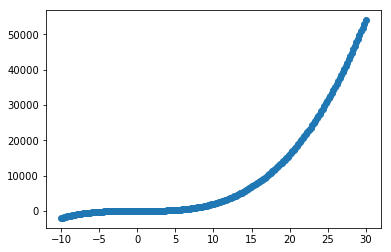

In [9]:
# Plot training data
plt.scatter(X[:, 1], y)


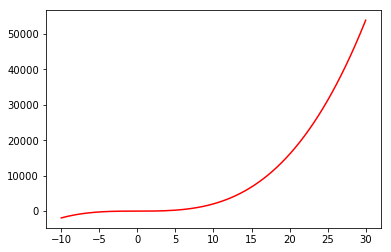

In [10]:
plt.plot(X[:, 1], np.matmul(X, theta), color='red')


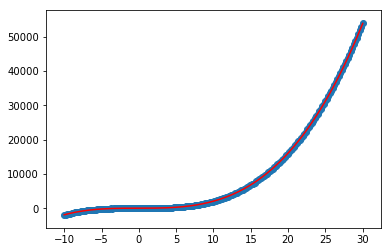

In [11]:
# plt.plot(np.arange(len(costs)), costs)
# Plot training data
plt.plot(X[:, 1], np.matmul(X, theta), color='red')
plt.scatter(X[:, 1], y)

plt.show()